In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("College.csv")
data.loc[(data.Private == 'No'),'Private'] = 0
data.loc[(data.Private == 'Yes'),'Private'] = 1
data.astype({'Private': 'float32'})

X = data.loc[:, data.columns != 'Apps']
X = X.iloc[:,1:]

y = data['Apps']

In [ ]:
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [2]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.5, random_state=42)



In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()

predictions = lm.fit(X_train, y_train).predict(X_test)
print("MSE:")
print(mean_squared_error(predictions, y_test))
print("R^2:")
print(lm.score(X_test, y_test))

MSE:
1654196.509145673
R^2:
0.9113754682885489


In [4]:
from sklearn.model_selection import KFold
from sklearn import linear_model
import math

def select_best_lambda(regressor, X, y, k = 10, lambdaMax = 50, lambdaStep = 0.1):
  cv_scores = []
  best_score = np.inf
  best_lambda = 0;
  n = X.shape[0]

  for a in np.arange(0, lambdaMax, lambdaStep):
    regression = regressor(alpha=a)
    kf = KFold(n_splits=k)
    CV = 0
    for train_indices, test_indices in kf.split(X, y):
      fitted = regression.fit(X.loc[train_indices], y[train_indices])
      numPredictors = np.count_nonzero(fitted.coef_)
      # we need RSS
      predictions = fitted.predict(X.loc[test_indices])

      RSS = n * mean_squared_error(y[test_indices], predictions)

      #we need estimate of the variance of the error (we know it is 1, but we should estimate it)
      #this is apparenlty RSS / (n-p)
      estVar = RSS / (n - numPredictors)
      #Use BIC
      score = (RSS + math.log(n)*numPredictors*estVar) / n
      CV = CV + score

    CV = CV / k
    if CV < best_score:
      best_score, best_lambda = CV, a

    cv_scores.append(CV)
  
  return best_lambda, best_score, cv_scores, lambdaMax, lambdaStep

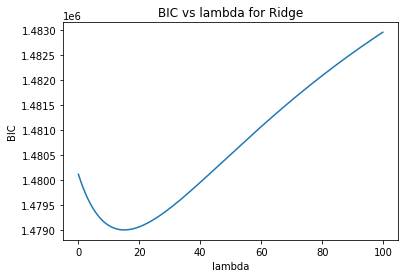

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

ridge = linear_model.Ridge

best_lambda, best_score, cv_scores, lambdaMax, lambdaStep = select_best_lambda(ridge, X, y, lambdaStep=0.1, lambdaMax=100)

plt.title("BIC vs lambda for Ridge")
plt.xlabel("lambda")
plt.ylabel("BIC")
plt.plot(np.arange(0, lambdaMax, lambdaStep), cv_scores)

In [21]:
fittedRidge = linear_model.Ridge(alpha=best_lambda).fit(X_train, y_train)

ridgePredictions = fittedRidge.predict(X_test)
print("Lambda:")
print(best_lambda)
print("MSE:")
print(mean_squared_error(predictions, y_test))
print("R^2:")
print(fittedRidge.score(X_test, y_test))

Lambda:
15.0
MSE:
1654196.509145673
R^2:
0.9115284414037086


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.724e+08, tolerance: 1.074e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_

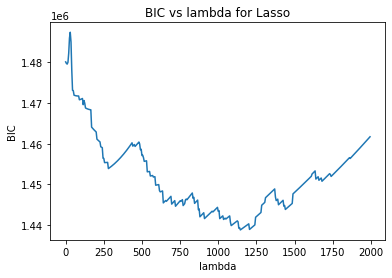

In [23]:
lasso = linear_model.Lasso

best_lambda, best_score, cv_scores, lambdaMax, lambdaStep = select_best_lambda(lasso, X, y, lambdaStep=5, lambdaMax=2000)

plt.title("BIC vs lambda for Lasso")
plt.xlabel("lambda")
plt.ylabel("BIC")
plt.plot(np.arange(0, lambdaMax, lambdaStep), cv_scores)

In [24]:
fittedLasso = linear_model.Lasso(alpha=best_lambda).fit(X_train, y_train)

lassoPredictions = fittedLasso.predict(X_test)
print("Lambda:")
print(best_lambda)
print("MSE:")
print(mean_squared_error(predictions, y_test))
print("R^2:")
print(fittedLasso.score(X_test, y_test))
print("Non-zero coef")
print(np.count_nonzero(fittedLasso.coef_))

Lambda:
1145
MSE:
1654196.509145673
R^2:
0.9063229907248909
Non-zero coef
11
